<a href="https://colab.research.google.com/github/akshatsanghvi211103/DIP_Project/blob/main/dip_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft


# Open the video file
cap = cv2.VideoCapture('bobble.mp4')
frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)
print(frames)
print(fps)
# Initialize previous frame
ret, prev_frame = cap.read()
prev_frame_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
print(prev_frame_gray.shape)

# Create a HSV color image for visualizing the optical flow
hsv = np.zeros_like(prev_frame)
hsv[..., 1] = 255
hsv[..., 0] = 255
count = 0
disp = None
# curr = np.zeros((1, prev_frame_gray.shape[0], prev_frame_gray.shape[1], 2)
curr = None

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # cv2.imwrite('frame.jpg', frame)
    # break
    
    # Convert the current frame to grayscale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calculate optical flow
    flow = cv2.calcOpticalFlowFarneback(
        prev_frame_gray, frame_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    if (disp is None):
        # disp = flow[np.newaxis, ...]
        curr = np.zeros((1, flow.shape[0], flow.shape[1], flow.shape[2]))
        disp = np.zeros((1, flow.shape[0], flow.shape[1], flow.shape[2]))
    else:
        curr = curr + flow[np.newaxis, ...]
        disp = np.concatenate([disp, curr], axis=0)
    # print(disp.shape)
    # Calculate the magnitude and direction of the optical flow
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    # Set the hue and value according to the angle and magnitude
    # hsv[..., 0] = angle * 180 / np.pi / 2
    # np.set_printoptions(threshold = np.inf)
    # print(magnitude)
    hsv[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

    # Convert HSV to BGR
    flow_rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    # Display the frame with optical flow
    # print(flow_rgb)
    # break
    # cv2.imshow('Optical Flow', flow_rgb)

    # if cv2.waitKey(30) & 0xFF == 27:  # Press 'Esc' to exit
    #     break

    # Update the previous frame
    prev_frame_gray = frame_gray
    if (count % 10 == 0):
      print(count)
    count += 1
    # if (count == 350):
    #     break


160.0
30.00750187546887
(480, 848)
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150


155
-0.025157232704402517


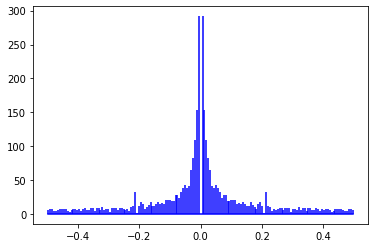

In [2]:
x = disp[:, 215, 260, 1]
x = x - np.mean(x)
# plt.plot(x)
fft_result = np.fft.fft(x)
num_samples = x.shape[0]
frequencies = np.fft.fftfreq(num_samples)
magnitude = np.abs(fft_result)
# print(np.max(magnitude))
plt.stem(frequencies, magnitude, 'b', markerfmt=" ", basefmt="-b")

max_freq_index = np.argsort(magnitude)[::-1][6]
print(max_freq_index)
max_freq = frequencies[max_freq_index]
print(max_freq)

plt.show()


In [29]:
print(prev_frame.shape)
print()

(480, 848, 3)



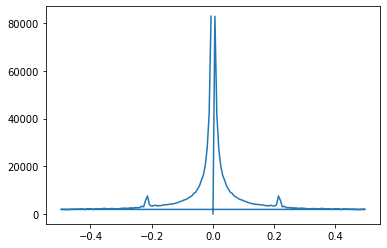

In [3]:
new_img = np.zeros_like(prev_frame)
new_img[:, :, 1] = 255
new_img[:, :, 0] = 255
freq_index = 34

fft_frequencies = None
T = disp.shape[0]
magnitude_sums = np.zeros(T)

for i in range(480):
  for j in range(848):
    x = disp[:, i, j, 1]
    x = x - np.mean(x)
    # plt.plot(x)
    fft_result = np.fft.fft(x)
    num_samples = x.shape[0]
    frequencies = np.fft.fftfreq(num_samples)
    magnitude = np.abs(fft_result)

    fft_frequencies = frequencies
    magnitude_sums += magnitude

    max_magnitude = magnitude[freq_index]

    angle = np.angle(fft_result)[freq_index]
    new_img[i, j, 0] = angle
    new_img[i, j, 2] = max_magnitude

magnitude_sums /= T
plt.plot(fft_frequencies, magnitude_sums)


new_img[:, :, 2] = cv2.normalize(new_img[:, :, 2], None, 0, 255, cv2.NORM_MINMAX)
flow_rgb = cv2.cvtColor(new_img, cv2.COLOR_HSV2BGR)

# plt.imshow(flow_rgb)
plt.show()


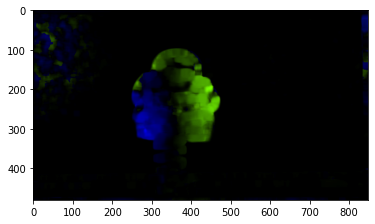

In [4]:
plt.imshow(flow_rgb)

In [4]:
index = np.argsort(magnitude_sums)[::-1]
main_index = 0
count = 0
for i in range(1, index.shape[0] - 1):
  if ((magnitude_sums[i] > magnitude_sums[i - 1]) & (magnitude_sums[i] > magnitude_sums[i + 1])):
    main_index = i
    count += 1

  if count > 3:
    break

print(main_index)
print()
print(fft_frequencies[main_index])
print()
print(magnitude_sums[main_index])

34

0.2138364779874214

7547.76929957539


In [5]:
w_index = 34
best_mode = []
for i in range(480):
  for j in range(848):
    x = disp[:, i, j, 1]
    x = x - np.mean(x)
    # plt.plot(x)
    fft_result = np.fft.fft(x)
    best_mode.append(fft_result[w_index])

best_mode = np.array(best_mode)

Using their modal coordinate equation

[[0.         0.        ]
 [0.         0.34947445]
 [0.34947445 0.32705533]
 ...
 [0.00103369 0.00339874]
 [0.00443243 0.00313344]
 [0.00756587 0.00272975]]


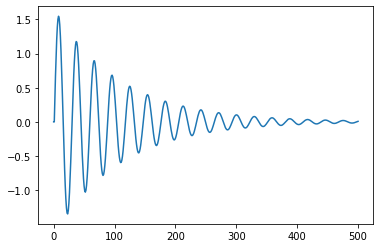

In [6]:
a = 1
p = [220, 519] # point of application of force
d = [-1, 1] # x and y component
f_i = d[1] * np.abs(best_mode[p[0] * 848 + p[1]])
f = f_i

t = 500
y = np.zeros((t + 1, 2))
h = 1 # we had assumed time stamp is 1 in the x+vt
d = 0.15
m = 1
w = 0.2138364779874214


m1 = np.array([[1, h], [-w**2 * h, 1 - 2*d*w*h]])
m2 = np.array([0, h/m])
for i in range(t):
  if(i != 0):
    f = 0
  y[i + 1] = (m1 @ y[i].T) + (m2.T * f)
  y[i + 1] = y[i + 1].T


print(y)
plt.plot(y[:, 0])


Finding phi (modal matrix)

In [7]:
final_destination = np.zeros((t, 480*848))

for i in range(t):
  q = np.complex128(y[i][0] + (y[i][1] / w) * 1j)
  final_destination[i, :] = (q * best_mode).real

print(final_destination.shape)

(500, 407040)


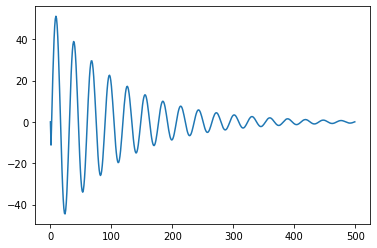

In [8]:
p2 = [215, 260]
ans = final_destination[:, p2[0] * 848 + p2[1]]
plt.plot(ans)

In [9]:
print(final_destination.shape)
final_destination = final_destination / 750

(500, 407040)


In [10]:
frame = cv2.imread('frame.jpg')

In [20]:
# inpainting_mask = np.zeros_like(frame, dtype=np.uint8)
inpainting_mask = np.zeros((frame.shape[0], frame.shape[1]), dtype=np.uint8)

# Initialize the current frame with the initial frame
current_frame = np.ones_like(frame, dtype=np.uint8) * 255
video_frames = []
# Loop through each frame
for frame_idx in range(200):
    flow_data_x = final_destination[frame_idx]  # X-direction flow data for the current frame
    # Loop through each pixel's optical flow in the current frame
    for y in range(480):
        for x in range(848):
            flow_x = flow_data_x[y * 848 + x]
            new_x = int(y + flow_x)
            if (flow_x > 1):
                print(flow_x, y, x)

            # Check if the new x-coordinate is within the frame
            if 0 <= new_x < current_frame.shape[0]:
                # Apply optical flow to the pixel
                current_frame[new_x, x] = frame[y, x]
            else:
                # Mark the pixel for inpainting (out of frame)
                inpainting_mask[y, x] = 255  # Set to white


    for i in range(480):
        for j in range(848):
            if (inpainting_mask[i, j] == 255):
                current_frame[i, j] = 0
                inpainting_mask[i, j] = 255
    # Perform inpainting on the current frame to fill gaps
    inpainting_radius = 5  # Adjust the radius as needed
    current_frame = cv2.inpaint(current_frame, inpainting_mask, inpainting_radius, cv2.INPAINT_TELEA)
    video_frames.append(current_frame)

    # Display or save the current frame
    cv2.imshow('Inpainting Result', current_frame)
    cv2.waitKey(1)  # Adjust the delay between frames as needed (ms)

cv2.destroyAllWindows()


KeyboardInterrupt: 

: 

In [16]:
# converting all the frames to a video
height, width, layers = video_frames[0].shape
size = (width, height)
out = cv2.VideoWriter('project_y.avi', cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
for i in range(len(video_frames)):
    out.write(video_frames[i])
out.release()
